In [1]:
import torch
import pandas as pd, numpy as np
from glob import glob
from tqdm.notebook import tqdm
import os
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
import torch.nn.functional as F

In [2]:
dfA = []
for path in tqdm(glob('./data/raw/training_setA/training/*.psv')):
    df = pd.read_csv(path, sep="|")
    pid = int(path.split("\\")[1][1:-4])
    df['pid']=pid
    dfA.append(df)

dfB=[]
for path in tqdm(glob('./data/raw/training_setB/training_setB/*.psv')):
    df = pd.read_csv(path, sep="|")
    pid = int(path.split("\\")[1][1:-4])
    df['pid'] = pid
    dfB.append(df)  

  0%|          | 0/20336 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [3]:
dfA = pd.concat(dfA)
dfB = pd.concat(dfB)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
dfA

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,88.0,98.0,NaN,135.0,81.00,64.0,16.0,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,31,1,20643
29,96.0,98.0,38.72,174.0,97.00,72.0,16.0,NaN,2.0,NaN,NaN,7.48,34.0,97.0,90.0,26.0,107.0,NaN,NaN,2.5,NaN,NaN,NaN,2.2,3.5,3.9,0.9,NaN,27.8,NaN,NaN,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,32,1,20643
30,140.0,97.0,NaN,133.0,81.50,62.5,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,33,1,20643
31,120.0,96.0,NaN,154.0,118.00,105.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.29,1,NaN,NaN,-0.03,34,1,20643


In [6]:
dfB

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1.0,0.0,-214.64,1,0,100001
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1.0,0.0,-214.64,2,0,100001
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1.0,0.0,-214.64,3,0,100001
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1.0,0.0,-214.64,4,0,100001
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1.0,0.0,-214.64,5,0,100001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,80.0,96.0,NaN,115.0,87.0,65.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,0,NaN,NaN,0.00,31,0,120000
31,74.0,97.0,NaN,114.0,83.0,67.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,0,NaN,NaN,0.00,32,0,120000
32,78.0,98.0,NaN,110.0,83.0,69.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,0,NaN,NaN,0.00,33,0,120000
33,82.0,99.0,36.6,124.0,91.0,71.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,0,NaN,NaN,0.00,34,0,120000


In [7]:
df = pd.concat([dfA,dfB]).reset_index(drop=True)

In [8]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,80.0,96.0,NaN,115.0,87.00,65.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0,NaN,NaN,0.00,31,0,120000
1552206,74.0,97.0,NaN,114.0,83.00,67.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0,NaN,NaN,0.00,32,0,120000
1552207,78.0,98.0,NaN,110.0,83.00,69.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0,NaN,NaN,0.00,33,0,120000
1552208,82.0,99.0,36.6,124.0,91.00,71.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0,NaN,NaN,0.00,34,0,120000


### train, test 분리

In [104]:
# 3만명의 샘플을 가져온다.
train_pids = df.pid.sample(30000, replace=False, random_state=1234)

train_pids = np.random.choice(df.pid.unique(), 30000, replace=False)
train_df = df.query('pid in @train_pids').reset_index(drop=True)
test_df = df.query('pid not in @train_pids').reset_index(drop=True)

In [10]:
train_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,1,0,3
1,87.0,96.0,NaN,131.0,70.33,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,2,0,3
2,93.0,97.0,37.11,130.0,69.33,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,3,0,3
3,90.0,95.0,NaN,128.0,69.33,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,4,0,3
4,89.0,97.0,NaN,137.0,62.67,50.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883459,46.0,97.0,NaN,156.0,110.00,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,21,0,119997
883460,46.0,98.0,NaN,145.0,104.00,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,22,0,119997
883461,52.0,98.0,NaN,123.0,93.00,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,23,0,119997
883462,64.0,97.0,NaN,103.0,78.00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,24,0,119997


In [11]:
test_df.iloc[60:100,:]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
60,58.0,99.0,NaN,133.0,68.00,43.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,7,0,2
61,57.0,100.0,NaN,118.0,62.00,37.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,8,0,2
62,62.0,100.0,NaN,126.0,66.00,37.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,9,0,2
63,58.0,95.0,36.11,143.0,77.00,47.0,11.0,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,7.9,113.0,2.5,NaN,78.0,NaN,2.5,4.4,5.1,NaN,NaN,27.8,9.7,NaN,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0,2
64,60.0,95.0,NaN,153.0,83.00,49.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,11,0,2
65,60.0,94.0,NaN,140.0,74.00,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,12,0,2
66,62.0,95.0,NaN,139.0,72.00,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,13,0,2
67,63.0,95.0,NaN,143.0,75.00,44.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,14,0,2
68,63.0,97.0,36.11,154.0,81.00,46.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,15,0,2
69,58.0,94.0,NaN,114.0,58.00,36.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.91,0,0.0,1.0,-98.60,16,0,2


In [12]:
train_df.iloc[:50,:]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,1,0,3
1,87.0,96.0,NaN,131.0,70.33,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,2,0,3
2,93.0,97.0,37.11,130.0,69.33,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,3,0,3
3,90.0,95.0,NaN,128.0,69.33,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,4,0,3
4,89.0,97.0,NaN,137.0,62.67,50.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,5,0,3
5,84.0,97.0,NaN,144.0,81.00,52.0,19.0,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,31.0,NaN,11.1,99.0,0.9,NaN,51.0,NaN,2.5,2.4,3.8,NaN,NaN,26.9,9.1,NaN,10.0,NaN,488.0,45.82,0,1.0,0.0,-1195.71,6,0,3
6,82.0,97.0,38.33,140.0,77.00,50.0,26.0,NaN,8.0,NaN,0.5,7.51,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,7,0,3
7,84.0,97.0,38.61,135.0,75.00,50.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,8,0,3
8,91.0,95.0,NaN,147.0,85.00,55.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,9,0,3
9,92.0,96.0,NaN,140.0,80.00,52.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,10,0,3


In [13]:
test_df.iloc[:50,:]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0,1
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0,1
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0,1
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0,1
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0,1


In [14]:
train_df.pid.unique()

array([     3,      6,      7, ..., 119994, 119996, 119997], dtype=int64)

In [15]:
test_df.pid.unique()

array([     1,      2,      4, ..., 119998, 119999, 120000], dtype=int64)

In [16]:
train_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,1,0,3
1,87.0,96.0,NaN,131.0,70.33,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,2,0,3
2,93.0,97.0,37.11,130.0,69.33,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,3,0,3
3,90.0,95.0,NaN,128.0,69.33,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,4,0,3
4,89.0,97.0,NaN,137.0,62.67,50.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.82,0,1.0,0.0,-1195.71,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883459,46.0,97.0,NaN,156.0,110.00,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,21,0,119997
883460,46.0,98.0,NaN,145.0,104.00,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,22,0,119997
883461,52.0,98.0,NaN,123.0,93.00,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,23,0,119997
883462,64.0,97.0,NaN,103.0,78.00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,1,NaN,NaN,-0.02,24,0,119997


### Nan 값 채우기 (median & forward fill)

In [105]:
vital_cols=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

col_stat = {}

for col in tqdm(vital_cols):
    col_stat[col] = {}
    col_stat[col]['mean']=train_df[col].median()
    col_stat[col]['median'] = train_df[col].median()
    col_stat[col]['std'] = train_df[col].std()
    
    first_index = train_df.drop_duplicates(['pid'], keep='first').index
    train_df.loc[first_index, col] = train_df.loc[first_index,col].apply(lambda x:col_stat[col]['median'] if pd.isna(x) else x)
    train_df[col] = train_df[col].fillna(method='ffill')
    
    first_index = test_df.drop_duplicates(['pid'], keep='first').index
    test_df.loc[first_index, col] = test_df.loc[first_index,col].apply(lambda x:col_stat[col]['median'] if pd.isna(x) else x)
    test_df[col] = test_df[col].fillna(method='ffill')

  0%|          | 0/34 [00:00<?, ?it/s]

NEWS score ['HR', 'O2Sat', 'Temp', 'SBP', 'Resp']

In [23]:
test_df.at[test_df.index[0],'Temp']

37.0

In [24]:
news_score = 0
if test_df.at[test_df.index[0],'Temp'] <= 35.0:
    news_score += 3
elif 35.1 <= test_df.at[test_df.index[0],'Temp'] <= 36.0:
    news_score += 1
elif 36.1 <= test_df.at[test_df.index[0],'Temp'] <= 38.0:
    news_score += 0
elif 38.1 <= test_df.at[test_df.index[0],'Temp'] <= 39.0:
    news_score += 1
elif 39.1 <= test_df.at[test_df.index[0],'Temp']:
    news_score += 1
news_score

0

In [25]:
test_df.loc[0]

HR                   84.00
O2Sat                98.00
Temp                 37.00
SBP                 122.00
MAP                  81.00
DBP                  62.00
Resp                 18.00
EtCO2                33.00
BaseExcess            0.00
HCO3                 24.00
FiO2                  0.50
pH                    7.39
PaCO2                40.00
SaO2                 97.00
AST                  43.00
BUN                  18.00
Alkalinephos         74.00
Calcium               8.20
Chloride            106.00
Creatinine            0.96
Bilirubin_direct      0.50
Glucose             127.00
Lactate               1.80
Magnesium             2.00
Phosphate             3.30
Potassium             4.10
Bilirubin_total       0.90
TroponinI             0.37
Hct                  30.10
Hgb                  10.20
PTT                  32.40
WBC                  10.40
Fibrinogen          250.00
Platelets           179.00
Age                  83.14
Gender                0.00
Unit1                  NaN
U

In [26]:
# NEWS score 구하기
def get_NEWS(news_input):
    
    news_score = 0
    
    if news_input['Temp'] <= 35.0:
        news_score += 3
    elif 35.1 <= news_input['Temp'] <= 36.0:
        news_score += 1
    elif 36.1 <= news_input['Temp'] <= 38.0:
        news_score += 0
    elif 38.1 <= news_input['Temp'] <= 39.0:
        news_score += 1
    elif 39.1 <= news_input['Temp']:
        news_score += 1
        
    if news_input['SBP'] <= 90:
        news_score += 3
    elif 91 <= news_input['SBP'] <= 100:
        news_score += 2
    elif 101 <= news_input['SBP'] <= 110:
        news_score += 1
    elif 111 <= news_input['SBP'] <= 219:
        news_score += 0
    elif 220 <= news_input['SBP']:
        news_score += 3
        
    if news_input['Resp'] <= 8:
        news_score += 3
    elif 9 <= news_input['Resp'] <= 11:
        news_score += 1
    elif 12 <= news_input['Resp'] <= 20:
        news_score += 0
    elif 21 <= news_input['Resp'] <= 24:
        news_score += 2
    elif 25 <= news_input['Resp']:
        news_score += 3
        
    if news_input['HR'] <= 40:
        news_score += 3
    elif 41 <= news_input['HR'] <= 50:
        news_score += 1
    elif 51 <= news_input['HR'] <= 90:
        news_score += 0
    elif 91 <= news_input['HR'] <= 110:
        news_score += 1
    elif 111 <= news_input['HR'] <= 130:
        news_score += 2
    elif 131 <= news_input['HR']:
        news_score += 3
        
    if news_input['O2Sat'] <= 91:
        news_score += 3
    elif 92 <= news_input['O2Sat'] <= 93:
        news_score += 2
    elif 94 <= news_input['O2Sat'] <= 95:
        news_score += 1
    elif 96 <= news_input['O2Sat']:
        news_score += 0
        
        
    return news_score

test_df['NEWS'] = 0
news_columns = ['Temp','Resp', 'SBP', 'HR', 'O2Sat'] # NEWS에서 쓰는 컬럼 리스트
for i in tqdm(test_df.index):
    news_input = test_df.loc[i, news_columns]
    test_df.at[i, 'NEWS'] = get_NEWS(news_input)

  0%|          | 0/668746 [00:00<?, ?it/s]

In [46]:
test_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid,NEWS
0,84.0,98.0,37.0,122.0,81.00,62.0,18.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,1,0,1,0
1,97.0,95.0,37.0,98.0,75.33,62.0,19.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,2,0,1,4
2,89.0,99.0,37.0,122.0,86.00,62.0,22.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,3,0,1,2
3,90.0,95.0,37.0,122.0,86.00,62.0,30.0,33.0,24.0,24.0,0.50,7.36,100.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,4,0,1,4
4,103.0,88.5,37.0,122.0,91.33,62.0,24.5,33.0,24.0,24.0,0.28,7.36,100.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668741,80.0,96.0,36.4,115.0,87.00,65.0,15.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,239.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,31,0,120000,0
668742,74.0,97.0,36.4,114.0,83.00,67.0,15.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,239.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,32,0,120000,0
668743,78.0,98.0,36.4,110.0,83.00,69.0,15.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,239.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,33,0,120000,1
668744,82.0,99.0,36.6,124.0,91.00,71.0,16.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,242.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,34,0,120000,0


In [28]:
test_df['NEWS'].unique()

array([ 0,  4,  2,  6,  9,  5,  7,  3,  8,  1, 10, 12, 11, 13, 14, 15],
      dtype=int64)

NEWS
AUROC score: 0.6255


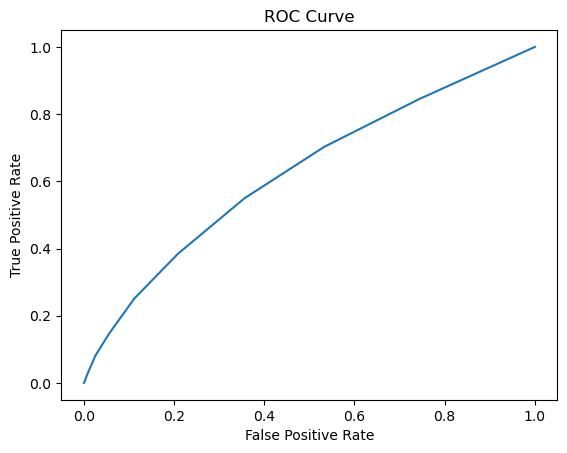

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y_pred와 y_true가 주어진다고 가정합니다
fpr, tpr, thresholds = roc_curve(test_df['SepsisLabel'], test_df['NEWS'])
auroc_score = roc_auc_score(test_df['SepsisLabel'], test_df['NEWS'])
print('NEWS')

# AUROC 점수와 ROC 곡선을 출력합니다
print(f"AUROC score: {auroc_score:.4f}")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [30]:
test_df['NEWS'].max()

15

In [69]:
test_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,pid,NEWS
0,84.0,98.0,37.0,122.0,81.00,62.0,18.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,1,0,1,0
1,97.0,95.0,37.0,98.0,75.33,62.0,19.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,2,0,1,4
2,89.0,99.0,37.0,122.0,86.00,62.0,22.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,3,0,1,2
3,90.0,95.0,37.0,122.0,86.00,62.0,30.0,33.0,24.0,24.0,0.50,7.36,100.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,4,0,1,4
4,103.0,88.5,37.0,122.0,91.33,62.0,24.5,33.0,24.0,24.0,0.28,7.36,100.0,97.0,43.0,18.0,74.0,8.2,106.0,0.96,0.5,127.0,1.8,2.0,3.3,4.1,0.9,0.37,30.1,10.2,32.4,10.4,250.0,179.0,83.14,0,NaN,NaN,-0.03,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668741,80.0,96.0,36.4,115.0,87.00,65.0,15.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,239.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,31,0,120000,0
668742,74.0,97.0,36.4,114.0,83.00,67.0,15.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,239.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,32,0,120000,0
668743,78.0,98.0,36.4,110.0,83.00,69.0,15.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,239.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,33,0,120000,1
668744,82.0,99.0,36.6,124.0,91.00,71.0,16.0,33.0,0.0,24.0,0.50,7.39,40.0,97.0,18.0,11.0,75.0,8.9,106.0,0.54,0.1,242.0,1.8,2.2,4.0,3.6,0.9,0.37,37.1,11.6,29.1,5.4,250.0,216.0,62.00,0,NaN,NaN,0.00,34,0,120000,0


In [87]:
pd.set_option('display.max_rows',None)

In [88]:
test_df['Creatinine'].value_counts()

0.96     167806
0.70      38259
0.80      37869
0.60      30549
0.90      29857
1.00      24500
0.50      19581
1.10      17348
1.20      12410
1.30       9592
0.40       8058
1.40       7136
1.50       5666
1.60       5046
1.70       3957
0.76       3061
0.77       3050
0.82       3033
0.73       3015
0.71       2944
0.81       2907
0.83       2858
0.84       2839
0.72       2807
0.88       2796
1.90       2795
0.69       2792
1.80       2788
0.79       2761
0.63       2704
0.89       2659
0.68       2657
2.00       2635
0.67       2615
0.87       2609
0.78       2607
0.30       2577
0.66       2528
0.85       2456
0.95       2450
0.92       2433
0.74       2413
0.86       2390
0.91       2388
0.75       2360
0.64       2323
0.94       2313
0.93       2305
0.62       2289
0.59       2268
0.65       2245
1.03       2213
0.98       2043
0.61       2043
0.99       2020
0.97       1958
1.07       1922
1.01       1901
1.04       1831
2.10       1779
1.06       1777
1.05       1776
1.11    

In [ ]:
test_df.at[test_df.index[0],'PaCO2']

In [100]:
x=15

In [101]:
if 5<x<15:
    print(2)

In [102]:
5<x<15

False

In [110]:
test_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'pid', 'SOFA'],
      dtype='object')

In [148]:
def get_pao2(spo2):
    sp_map = {
                85:50,
                86:51,
                87:52,
                88:54,
                89:56,
                90:58,
                91:60,
                92:64,
                93:68,
                94:73,
                95:80,
                96:90,
                97:110
            }
    spo2 = int(round(spo2))
    if spo2 <85:
        spo2=85
    if spo2>97:
        spo2=97
    return sp_map[spo2]

In [149]:
test_df['PaO2'] = test_df['SaO2'].apply(get_pao2)

In [154]:
def get_SOFA(sofa_input) :
    # ToDo : sofa계산
    sofa_scores = 0
    # Respiratory system score
    if sofa_input['FiO2']>0:
        if 300 <= sofa_input['PaO2']/sofa_input['FiO2'] < 400:
                sofa_scores += 1
        elif 200 <= sofa_input['PaO2']/sofa_input['FiO2'] < 300:
            sofa_scores += 2
        elif 100 <= sofa_input['PaO2']/sofa_input['FiO2'] < 200:
            sofa_scores += 3
        elif sofa_input['PaO2']/sofa_input['FiO2'] < 100:
            sofa_scores += 4

            
    # Coagulation system score
    if 100 <= sofa_input['Platelets'] < 150:
        sofa_scores += 1
    elif 50 <= sofa_input['Platelets'] < 100:
        sofa_scores += 2
    elif 20 <= sofa_input['Platelets'] < 50:
        sofa_scores += 3
    elif sofa_input['Platelets'] < 20:
        sofa_scores += 4
    
    # Liver system score
    if 1.2 <= sofa_input['Bilirubin_total'] < 2.0 :
        sofa_scores += 1
    elif 2.0 <= sofa_input['Bilirubin_total'] < 6.0 :
        sofa_scores += 2
    elif 6.0 <= sofa_input['Bilirubin_total'] < 12.0:
        sofa_scores += 3
    elif 12.0 <= sofa_input['Bilirubin_total']:
        sofa_scores += 4
    
    # Cardiovascular system score
    if sofa_input['MAP'] < 70:
        sofa_scores += 1
        
        
    # Renal system score
    if 1.2 <= sofa_input['Creatinine'] < 2.0:
        sofa_scores += 1
    elif 2.0 <= sofa_input['Creatinine'] < 3.5 :
        sofa_scores += 2
    elif 3.5 <= sofa_input['Creatinine'] < 5.0 :
        sofa_scores += 3
    elif 5.0 <= sofa_input['Creatinine']:
        sofa_scores += 4
        
    return sofa_scores

test_df['SOFA'] = 0
sofa_columns = ['PaO2', 'FiO2','Platelets', 'MAP', 'Bilirubin_total', 'Creatinine'] # SOFA에서 쓰는 컬럼 리스트
sofa_scores = []
for i in tqdm(test_df.index):
    sofa_input = test_df.loc[i, sofa_columns]
    sofa_scores.append(get_SOFA(sofa_input))
test_df['SOFA'] = sofa_scores

  0%|          | 0/394666 [00:00<?, ?it/s]

In [155]:
test_df['SOFA'].value_counts()

2     164276
3      97433
4      52426
5      27825
6      20933
7      10844
1       7566
8       5401
9       2665
0       2249
10      1610
11       836
12       490
13        72
14        40
Name: SOFA, dtype: int64

SOFA
AUROC score: 0.6040


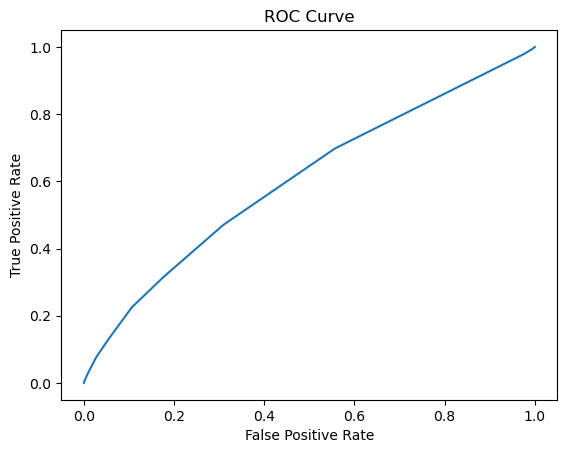

In [156]:
fpr, tpr, thresholds = roc_curve(test_df['SepsisLabel'], test_df['SOFA'])
auroc_score = roc_auc_score(test_df['SepsisLabel'], test_df['SOFA'])
print('SOFA')

# AUROC 점수와 ROC 곡선을 출력합니다
print(f"AUROC score: {auroc_score:.4f}")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Normalize

In [ ]:
for col in tqdm(vital_cols) :
    train_df[col] = (train_df[col]-col_stat[col]['mean'])/col_stat[col]['std']

In [ ]:
for col in tqdm(vital_cols):
    mean_value = train_df[col].mean()   

In [ ]:
for col in tqdm(vital_cols):
    std_value = train_df[col].std()   

In [ ]:
for col in tqdm(vital_cols) :
    test_df[col] = (test_df[col]-col_stat[col]['mean'])/col_stat[col]['std']

In [ ]:
train_df.iloc[150:390,:]

In [ ]:
dfA.query('pid==9')[['pid','ICULOS','SepsisLabel']].loc[240]

In [ ]:
train_df.iloc[150:391,:]

In [ ]:
'''
할일 : train_df에서 batch_size만큼 length=30 seq 데이터를 추출해와서 배치 만들어서 모델에 집어넣기
+ 패혈증, 일반 데이터 균등 샘플링
'''

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, WeightedRandomSampler

In [ ]:
def _make_window(rows, group, feature_columns, sequence_length):
        X = []
        for i in range(len(rows)):
            row = rows.iloc[i]

            df = group.get_group((row.pid))
            df = df.loc[:row.name]
            features = df[feature_columns].values

            if len(features) < sequence_length:
                x = np.zeros([sequence_length, len(feature_columns)])
                x[-len(features):] = features
            else:
                x = features[-sequence_length:]

            X.append(x)

        return X
    
class Physionet2019(Dataset):
    def __init__(self, df):
        self.group = df.groupby(['pid'])
        self.seq_len = 30
        self.df = df 
        self.feat_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
                           'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
                           'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
                           'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
                           'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
                           'Fibrinogen', 'Platelets']
        self.info_cols = ['pid', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Age','Gender']

    def __len__(self):
        return len(self.df)

    def get_x_y(self, idx, df):
        rows = df.iloc[[idx]]
        x = _make_window(rows, self.group, self.feat_cols, self.seq_len)
        y = list(rows['SepsisLabel'].values)
        return x, y, rows
    
    def __getitem__(self, idx):
        x, y, rows = self.get_x_y(idx, self.df)
        return x, y, list(rows[self.info_cols].values)

In [ ]:
train_ds = Physionet2019(train_df)
test_ds = Physionet2019(test_df)

In [ ]:
train_ds

In [ ]:
x, y, info = test_ds[10] 

In [ ]:
x

In [ ]:
y

In [ ]:
info

In [ ]:
def get_sampler(train_df):
    class_counts = train_df['SepsisLabel'].value_counts() 
    num_samples = sum(class_counts)
    labels = train_df['SepsisLabel'].to_list()

    #클래스별 가중치 부여 [48000/43200, 48000/4800] => class 1에 가중치 높게 부여하게 됨
    class_weights = [num_samples / class_counts[i] for i in range(len(class_counts))] 

    # 해당 데이터의 label에 해당되는 가중치
    weights = [class_weights[labels[i]] for i in range(int(num_samples))] #해당 레이블마다의 가중치 비율
    sampler = WeightedRandomSampler(torch.DoubleTensor(weights), int(num_samples))
    return sampler

In [ ]:
def val_collate(batch):
    X = []
    Label = []
    INFO = []
    for x, label, info in batch:
        for i in range(len(x)):
            X.append(x[i])
            Label.append(label[i])
            INFO.append(info[i])

    X_ = [torch.Tensor(x) for x in X]
    xs = torch.stack(X_, dim=0)
    return xs, torch.Tensor(Label), np.array(INFO)

In [ ]:
train_dl = DataLoader(train_ds, collate_fn=val_collate, sampler=get_sampler(train_df), batch_size=128)

In [ ]:
# 학습
for epoch in range(10):
    for data in train_dl:
        x, y, info = data
        pred = model(x)
        loss = loss_fn(y, pred)
        optimizer.
        
#평가
test_Y, test_pred, test_info = [], [], []
for data in test_dl:
    x, y, info = data
    pred = model(x)
    test_pred.append(pred)
    test_info.append(info)
    
test_info = np.concatenate(test_info)

